# Criando uma apresentação executiva
- Vamos usar a base de vendas do kaggle disponível em:
    - https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting

### O que queremos responder?
- Como foi a **venda** nesse período?
- Qual foi a **categoria mais vendida**?
- Qual foi o **item mais vendido**?


### 1. Importando e visualizando a base
- Base: "Criando uma apresentação executiva.csv"

In [20]:
# Importando as bibliotecas e a base

### 2. Entendendo e tratando a base

In [1]:
# Visualizando as informações da base

**Apenas código postal possui valores nulos, podemos visualizar quais linhas não possuem esse valor**

In [2]:
# Verificando os registros com Postal Code vazio

**Todos os registros sem código postal são da cidade de Burlington, em Vermont. Será que algum registro dessa cidade possui código postal?**

In [3]:
# Verificando se existe algum registro de Burlington, Vermont com Postal Code

**Podemos ir diretamente no google para buscar essa informação**

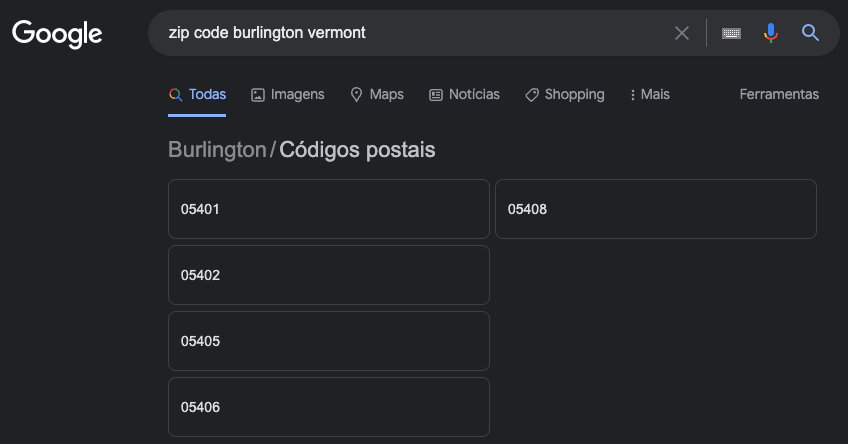

In [4]:
# Atualizando essa informação

In [5]:
# Verificando se ainda existe algum valor nulo

In [6]:
# Visualizando novamente as informações da base

### 3. <font color="blue"> Como foi a venda nesse período? </font>
Aqui temos 2 questões que precisamos pensar:
- **Quais <font color="blue">colunas</font> vamos usar?**
    - Podemos verificar a venda na coluna "Sales""
    - O período nós podemos usar a coluna "Order Date", mas precisamos entender melhor essa coluna
- **Qual o <font color="blue">período</font> queremos exibir?**

In [ ]:
# Para entender a data, podemos ver de qual período estamos falando

**<font color="red">CUIDADO:</font> Se a coluna de data estiver como texto e não como data, a ordenação vai ser pelo texto e não pela data!**

**Podemos converter uma coluna para data usando o to_datetime do pandas**
<br><br>
base["coluna"] = pd.**to_datetime(**base["coluna"]**)**
- No datetime, caso tenha apenas a data, a hora ficaria como 00:00:00
- Se quisermos considerar apenas a data, podemos usar o **.date** da biblioteca **datetime**

In [ ]:
import datetime as dt

In [ ]:
# Convertendo as colunas de data para datetime

In [ ]:
# Para entender a data, podemos ver de qual período estamos falando

In [ ]:
# Buscando o máximo da data

- Estamos falando de 4 anos de análise, começando em jan/2015 e indo até dez/2018

#### Como estamos falando de um período grande de anos, podemos começar a visualização pelos anos
- Para isso, podemos usar o **.year** da biblioteca datetime para criar uma nova coluna apenas com o ano dessa base

# Venda por ano

In [ ]:
# Criando uma coluna com o ano

#### Lembram do groupby()?

In [ ]:
# Usando essa coluna no group by e criando um plot de barras

## Melhorando o visual desse gráfico
- Como já vimos no último tópico, podemos melhorar muito a visualização desse gráfico. Vamos fazer isso!
- Primeiramente vamos traçar um gráfico usando o que aprendemos de matplotlib
    - https://matplotlib.org/stable/plot_types/basic/plot.html#sphx-glr-plot-types-basic-plot-py
    - Sugestão de cor: `#84ba5b`

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Criando um gráfico com o matplotlib usando o groupby

**Adicionando o título e melhorando os textos do eixo**
- Vamos adicionar o título e melhorar o eixo x
    - O `.set_title` vai permitir colocar título e ajustar os parâmetros desse títulos
        - fontsize: Tamanho da fonte
        - fontweight: Espessura da fonte
        - color: Cor da fonte
    - O `xaxis.set_ticks` vai definir os valores mostrados no eixo x
    - O `.tick_params(axis='x')` vai ajustar o parâmetro do eixo x
        - labelsize: tamanho do label

In [ ]:
fig,ax = plt.subplots(
            figsize = (9,4) # Tamanho da figura
        )

soma_ano = base.groupby("Ano")["Sales"].sum() # Valores que vamos usar para criar o nosso gráfico

ax.bar(soma_ano.index,soma_ano.values,
       color="#84ba5b" # Cor das barras
      )

plt.show()

**Adicionando o rótulo de dados**
- Para adicionar rótulo de dados, vamos usar o `.annotate` como vimos na última aula

In [ ]:
import numpy as np

In [ ]:
fig,ax = plt.subplots(
            figsize = (9,4) # Tamanho da figura
        )

soma_ano = base.groupby("Ano")["Sales"].sum() # Valores que vamos usar para criar o nosso gráfico

ax.bar(soma_ano.index,soma_ano.values,
       color="#84ba5b" # Cor das barras
      )

ax.set_title("VENDAS POR ANO", # Título do gráfico
             fontsize=20, # Tamanho da fonte
             fontweight='bold', # Espessura da fonte
             color='#00b247' # Cor da fonte
            )

ax.xaxis.set_ticks([2015,2016,2017,2018]) # Ajustando os valores de x
ax.tick_params(axis='x',labelsize=14) # Melhorando o visual do eixo x

plt.show()

**Melhorando a visualização do gráfico**
- Para o eixo y, podemos fazer igual fizemos para o eixo x
    - Com o `.set_yticks` vamos ajustar os valores do eixo y
    - O `.yaxis.set_visible(False)` permite retirar os valores do eixo y, tornando nosso visual mais claro
- Já para retirar as bordas do gráfico, basta usar o `.spines['top'].set_visible(False)`

In [ ]:
fig,ax = plt.subplots(
            figsize = (9,4) # Tamanho da figura
        )

soma_ano = base.groupby("Ano")["Sales"].sum() # Valores que vamos usar para criar o nosso gráfico

ax.bar(soma_ano.index,soma_ano.values,
       color="#84ba5b" # Cor das barras
      )

ax.set_title("VENDAS POR ANO", # Título do gráfico
             fontsize=20, # Tamanho da fonte
             fontweight='bold', # Espessura da fonte
             color='#00b247' # Cor da fonte
            )

ax.xaxis.set_ticks([2015,2016,2017,2018]) # Ajustando os valores de x
ax.tick_params(axis='x',labelsize=14) # Melhorando o visual do eixo x

# O Annotate é quem vai permitir que a gente coloque rótulo nos dados
for i in np.arange(0,4):
    ax.annotate('{:,.0f}'.format(soma_ano.values[i]).replace(',', '.'), # Valores que vão ser mostrados como rótulos, já formatados
                (soma_ano.index[i],soma_ano.values[i]), # Posição (x,y que esses valores vão estar)
                ha="center",  # Alinhamento horizontal do texto
                va="top", # Alinhamento vertical do texto
                xytext=(0,+15), # Deslocamento em relação ao ponto que o texto estaria
                textcoords="offset points",  # Sistema de coordenadas que o xytext vai ter como referência (nesse caso será em pontos, não em pixels)
                fontsize=14, # Tamanho da fonte dos rótulos
                fontweight='bold', # Espessura da fonte dos rótulos
                color="green" # Cor dos rótulos
            )

plt.show()

**Como resultado final, teremos o gráfico abaixo**

In [ ]:
fig,ax = plt.subplots(
            figsize = (9,4) # Tamanho da figura
        )

soma_ano = base.groupby("Ano")["Sales"].sum() # Valores que vamos usar para criar o nosso gráfico

ax.bar(soma_ano.index,soma_ano.values,
       color="#84ba5b" # Cor das barras
      )

ax.set_title("VENDAS POR ANO", # Título do gráfico
             fontsize=20, # Tamanho da fonte
             fontweight='bold', # Espessura da fonte
             color='#00b247' # Cor da fonte
            )

ax.xaxis.set_ticks([2015,2016,2017,2018]) # Ajustando os valores de x
ax.tick_params(axis='x',labelsize=14) # Melhorando o visual do eixo x

# O Annotate é quem vai permitir que a gente coloque rótulo nos dados
for i in np.arange(0,4):
    ax.annotate('{:,.0f}'.format(soma_ano.values[i]).replace(',', '.'), # Valores que vão ser mostrados como rótulos, já formatados
                (soma_ano.index[i],soma_ano.values[i]), # Posição (x,y que esses valores vão estar)
                ha="center",  # Alinhamento horizontal do texto
                va="top", # Alinhamento vertical do texto
                xytext=(0,+15), # Deslocamento em relação ao ponto que o texto estaria
                textcoords="offset points",  # Sistema de coordenadas que o xytext vai ter como referência (nesse caso será em pontos, não em pixels)
                fontsize=14, # Tamanho da fonte dos rótulos
                fontweight='bold', # Espessura da fonte dos rótulos
                color="green" # Cor dos rótulos
            )
    
ax.set_yticks(np.array([0,790000])) # Diminuindo o tamanho das barras para não cortar o rótulo
ax.yaxis.set_visible(False) # Retirando os valores do eixo y

ax.spines['top'].set_visible(False) # Retirando os traços do gráfico
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

# Venda por mês

#### Também podemos mostrar essa visão por meses
- Para isso, podemos usar o **.month** da biblioteca datetime para criar uma nova coluna apenas com o mês dessa base

In [ ]:
# Criando uma coluna com o mês

In [ ]:
# Fazendo o groupby agora por mês e ano

In [ ]:
# Verificando os valores gerados

**Com o <font color="blue">.reset_index()</font> conseguimos transformar os índices em colunas e então aplicar todas as propriedades que conhecemos para o DataFrame**

In [ ]:
# Vamos transformar os índices em colunas
soma_mes = soma_mes.reset_index()

In [ ]:
# Visualizando a base novamente

**Vamos usar o gráfico que fizemos na aula anterior para ir criando esse gráfico**

In [ ]:
# Criando o gráfico de mês com o matplotlib
fig,ax = plt.subplots(
            figsize = (9,4) # Tamanho da figura
        )

ax.bar(soma_ano.index,soma_ano.values,
       color="#84ba5b" # Cor das barras
      )

plt.show()

**Agora vamos adicionar a barra do ano de 2016**
- Vamos adicionar um gráfico de barras com os dados de 2016

In [ ]:
fig,ax = plt.subplots(
            figsize = (9,4) # Tamanho da figura
        )

ax.bar(soma_mes[soma_mes.Ano == 2015].Mes.values,soma_mes[soma_mes.Ano == 2015].Sales.values,
       color="#00c698", # Cor das barras
       label=2015 # Label dos dados
      )

plt.show()

**E então, deslocar as barras**
- Para isso, vamos usar o mesmo raciocínio do width que usamos na aula anterior
    - Para diferenciar os dados, também podemos usar o `label` para informar qual é cada um dos gráficos

In [ ]:
fig,ax = plt.subplots(
            figsize = (9,4) # Tamanho da figura
        )

ax.bar(soma_mes[soma_mes.Ano == 2015].Mes.values,
       soma_mes[soma_mes.Ano == 2015].Sales.values,
       color="#00c698"
      )
ax.bar(soma_mes[soma_mes.Ano == 2016].Mes.values, 
       soma_mes[soma_mes.Ano == 2016].Sales.values,
       color="#00a9b5"
      )

plt.show()

**Podemos agora adicionar todas as barras**

In [ ]:
fig,ax = plt.subplots(
            figsize = (9,4) # Tamanho da figura
        )

### VAMOS AJUSTAR ESSA PARTE DO CÓDIGO ADICIONANDO AS PARTES DO TAMANHO DAS BARRAS
wid = 0.3

ax.bar(soma_mes[soma_mes.Ano == 2015].Mes.values-wid/2, # <- DESLOCANDO A BARRA PARA A ESQUERDA
       soma_mes[soma_mes.Ano == 2015].Sales.values,
       color="#00c698", # Cor das barras
       label=2015, # Label dos dados
       width=wid # Largura das barras
      )
ax.bar(soma_mes[soma_mes.Ano == 2016].Mes.values+wid/2, # <- DESLOCANDO A BARRA PARA A DIREITA
       soma_mes[soma_mes.Ano == 2016].Sales.values,
       color="#00a9b5", 
       label=2016,
       width=wid 
      )

ax.legend()

plt.show()

**E vamos colocar rótulo apenas em 2018 para não poluir muito o gráfico**

In [ ]:
fig,ax = plt.subplots(
            figsize = (16,4) # Tamanho da figura
        )

wid = 0.2 # Tamanho das barras

ax.bar(soma_mes[soma_mes.Ano == 2015].Mes.values-wid-wid/2, # Ajuste da posição das barras
       soma_mes[soma_mes.Ano == 2015].Sales.values,
       color="#00c698", # Cor das barras
       label=2015, # Label dos dados
       width=wid # Largura das barras
      )
ax.bar(soma_mes[soma_mes.Ano == 2016].Mes.values-wid/2, # Ajuste da posição das barras
       soma_mes[soma_mes.Ano == 2016].Sales.values,
       color="#00a9b5", 
       label=2016,
       width=wid 
      )

# Adicionando o restante das barras
ax.bar(soma_mes[soma_mes.Ano == 2017].Mes.values+wid/2, # Ajuste da posição das barras
       soma_mes[soma_mes.Ano == 2017].Sales.values,
       color="#008ac5", 
       label=2017,
       width=wid 
      )
ax.bar(soma_mes[soma_mes.Ano == 2018].Mes.values+wid+wid/2, # Ajuste da posição das barras
       soma_mes[soma_mes.Ano == 2018].Sales.values,
       color="#0069c0", 
       label=2018,
       width=wid 
      )
ax.legend()
    
plt.show()

**Melhorando o visual retirando as bordas e ajustando o texto do eixo x**

In [ ]:
fig,ax = plt.subplots(
            figsize = (16,4) # Tamanho da figura
        )

wid = 0.2 # Tamanho das barras

ax.bar(soma_mes[soma_mes.Ano == 2015].Mes.values-wid-wid/2, # Ajuste da posição das barras
       soma_mes[soma_mes.Ano == 2015].Sales.values,
       color="#00c698", # Cor das barras
       label=2015, # Label dos dados
       width=wid # Largura das barras
      )
ax.bar(soma_mes[soma_mes.Ano == 2016].Mes.values-wid/2, 
       soma_mes[soma_mes.Ano == 2016].Sales.values,
       color="#00a9b5", 
       label=2016,
       width=wid 
      )

# Adicionando o restante das barras
ax.bar(soma_mes[soma_mes.Ano == 2017].Mes.values+wid/2, 
       soma_mes[soma_mes.Ano == 2017].Sales.values,
       color="#008ac5", 
       label=2017,
       width=wid 
      )
ax.bar(soma_mes[soma_mes.Ano == 2018].Mes.values+wid+wid/2, 
       soma_mes[soma_mes.Ano == 2018].Sales.values,
       color="#0069c0", 
       label=2018,
       width=wid 
      )
ax.legend()

# Adicionando o rótulo dos dados para 2018
for i in np.arange(0,12):
    ax.annotate('{:,.0f}k'.format(soma_mes[soma_mes.Ano == 2018].Sales.values[i]/1000), # Valores que vão ser mostrados como rótulos, já formatados
                (soma_mes[soma_mes.Ano == 2018].Mes.values[i]+wid+wid/2,soma_mes[soma_mes.Ano == 2018].Sales.values[i]), # Posição (x,y que esses valores vão estar)
                ha="center",  # Alinhamento horizontal do texto
                va="top", # Alinhamento vertical do texto
                xytext=(5,12), # Deslocamento em relação ao ponto que o texto estaria
                textcoords="offset points",  # Sistema de coordenadas que o xytext vai ter como referência (nesse caso será em pontos, não em pixels)
                fontsize=10, # Tamanho da fonte dos rótulos
                fontweight='bold', # Espessura da fonte dos rótulos
                color="#0069c0" # Cor dos rótulos
            )
    
plt.show()

**Como resultado final, teremos o gráfico abaixo**

In [ ]:
fig,ax = plt.subplots(
            figsize = (16,4) # Tamanho da figura
        )

wid = 0.2 # Tamanho das barras

ax.bar(soma_mes[soma_mes.Ano == 2015].Mes.values-wid-wid/2, # Ajuste da posição das barras
       soma_mes[soma_mes.Ano == 2015].Sales.values,
       color="#00c698", # Cor das barras
       label=2015, # Label dos dados
       width=wid # Largura das barras
      )
ax.bar(soma_mes[soma_mes.Ano == 2016].Mes.values-wid/2, 
       soma_mes[soma_mes.Ano == 2016].Sales.values,
       color="#00a9b5", 
       label=2016,
       width=wid 
      )

# Adicionando o restante das barras
ax.bar(soma_mes[soma_mes.Ano == 2017].Mes.values+wid/2, 
       soma_mes[soma_mes.Ano == 2017].Sales.values,
       color="#008ac5", 
       label=2017,
       width=wid 
      )
ax.bar(soma_mes[soma_mes.Ano == 2018].Mes.values+wid+wid/2, 
       soma_mes[soma_mes.Ano == 2018].Sales.values,
       color="#0069c0", 
       label=2018,
       width=wid 
      )
ax.legend()

# Adicionando o rótulo dos dados para 2018
for i in np.arange(0,12):
    ax.annotate('{:,.0f}k'.format(soma_mes[soma_mes.Ano == 2018].Sales.values[i]/1000), # Valores que vão ser mostrados como rótulos, já formatados
                (soma_mes[soma_mes.Ano == 2018].Mes.values[i]+wid+wid/2,soma_mes[soma_mes.Ano == 2018].Sales.values[i]), # Posição (x,y que esses valores vão estar)
                ha="center",  # Alinhamento horizontal do texto
                va="top", # Alinhamento vertical do texto
                xytext=(5,12), # Deslocamento em relação ao ponto que o texto estaria
                textcoords="offset points",  # Sistema de coordenadas que o xytext vai ter como referência (nesse caso será em pontos, não em pixels)
                fontsize=10, # Tamanho da fonte dos rótulos
                fontweight='bold', # Espessura da fonte dos rótulos
                color="#0069c0" # Cor dos rótulos
            )
    
ax.yaxis.set_visible(False) # Retirando os valores do eixo y

ax.spines['top'].set_visible(False) # Retirando os traços do gráfico
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.xaxis.set_ticks(np.arange(1,13)) # Ajustando os valores de x
ax.set_xticklabels(['Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez'])
ax.tick_params(axis='x',labelsize=14) # Melhorando o visual do eixo x
    
plt.show()

### 4. <font color="blue"> Qual foi a categoria mais vendida? </font>
Precisamos primeiro entender a informação de categoria

In [ ]:
# Podemos fazer um groupby da categoria

**Como estamos falando de 4 anos diferentes, seria interessante entender como foram essas categorias em cada um dos anos**

In [ ]:
# Agrupando por ano e categoria

**Uma forma de visualizar melhor essas informações é fazer um gráfico de barras com esses dados, bem semelhante ao que fizemos acima**

In [ ]:
# Criando agora a base de categorias como fizemos anteriormente

In [ ]:
# Visualizando 

**Utilizando a mesma lógica do gráfico anterior**

In [ ]:
# Vamos utilizar o mesmo código do gráfico anterior para exibir por categorias

**Como resultado final, teremos o gráfico abaixo**

In [ ]:
fig,ax = plt.subplots(
            figsize = (16,4)
        )

wid = 0.2 

ax.bar(categoria[categoria.Category == 'Furniture'].Ano.values-wid, # Como temos 3 colunas, vamos deslocar a largura da coluna inteira
       categoria[categoria.Category == 'Furniture'].Sales.values,
       color="#00c698", 
       label='Furniture', # As legendas agora serão as categorias
       width=wid
      )

ax.bar(categoria[categoria.Category == 'Office Supplies'].Ano.values, 
       categoria[categoria.Category == 'Office Supplies'].Sales.values,
       color="#00a9b5", 
       label='Office Supplies', 
       width=wid
      )

ax.bar(categoria[categoria.Category == 'Technology'].Ano.values+wid, 
       categoria[categoria.Category == 'Technology'].Sales.values,
       color="#008ac5", 
       label='Technology', 
       width=wid
      )

ax.legend()

for i in np.arange(0,4):
    ax.annotate('{:,.0f}k'.format(categoria[categoria.Category == 'Furniture'].Sales.values[i]/1000), 
                (categoria[categoria.Category == 'Furniture'].Ano.values[i]-wid,categoria[categoria.Category == 'Furniture'].Sales.values[i]), 
                ha="center", va="top", xytext=(0,15), textcoords="offset points", 
                fontsize=12, fontweight='bold', color="#00c698")
    ax.annotate('{:,.0f}k'.format(categoria[categoria.Category == 'Office Supplies'].Sales.values[i]/1000), 
                (categoria[categoria.Category == 'Office Supplies'].Ano.values[i],categoria[categoria.Category == 'Office Supplies'].Sales.values[i]), 
                ha="center", va="top", xytext=(0,15), textcoords="offset points", 
                fontsize=12, fontweight='bold', color="#00a9b5")
    ax.annotate('{:,.0f}k'.format(categoria[categoria.Category == 'Technology'].Sales.values[i]/1000), 
                (categoria[categoria.Category == 'Technology'].Ano.values[i]+wid,categoria[categoria.Category == 'Technology'].Sales.values[i]), 
                ha="center", va="top", xytext=(0,15), textcoords="offset points", 
                fontsize=12, fontweight='bold', color="#008ac5")   
    
ax.set_yticks(np.array([0,350000]))
ax.yaxis.set_visible(False) 

ax.spines['top'].set_visible(False) 
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.xaxis.set_ticks(np.arange(2015,2019)) 
ax.tick_params(axis='x',labelsize=12) 

plt.show()

### 4. <font color="blue"> Qual o item mais vendido? </font>
Vamos seguir exatamente a mesma lógica da categoria

**Podemos fazer a tabela considerando esses top itens**
- Para pegar uma base, podemos usar o `.head()` que já conhecemos
- Podemos também usar o `.sort_values()` para definirmos se a base será crescente ou descrescente

In [ ]:
# Podemos fazer um groupby do item

**Uma forma de resolver a quantidade de ítens seria fazer apenas para os top 10 ítens**

In [ ]:
# Os top 10 itens são

In [ ]:
# Definindo o top n itens

**Vamos traçar um gráfico de barras horizontais para mostrar o top 10 itens**
- https://matplotlib.org/stable/gallery/lines_bars_and_markers/barh.html#sphx-glr-gallery-lines-bars-and-markers-barh-py
- Podemos usar o `ax.invert_yaxis()` para inverter o eixo y

**Agora agrupando por ítem e ano**

In [ ]:
# Podemos fazer um groupby de item e ano

In [ ]:
# Para visualizar algum item dos top itens
itens_ano[itens_ano["Product Name"] == top_itens[0]]

**Como vamos criar esse gráfico? Como saber quais itens não aparecem em todos os anos?**

### Juntando bases no pandas

**O <font color='blue'>.merge()</font> irá juntar duas bases**
- Para isso, devemos passar:
    - base 1
    - base 2
    - how: forma que iremos fazer essa junção das bases
        - inner: o que tiver em comum entre as 2 bases (base 1 E base 2)
        - outer: tudo o que tiver nas 2 bases (base 1 OU base 2)
        - left: tudo o que tem na PRIMEIRA base, juntando com o que tiver na segunda
        - right: tudo o que tem na SEGUNDA base, juntando com o que tiver na primeira
    - on: colunar que vamos usar para fazer a junção da base

In [ ]:
# Criando 2 dataframes
dic1 = {
    "nomes": ['Nome1','Nome2','Nome3'],
    "valores": [1,2,3]
}

base_dic1 = pd.DataFrame(dic1)

dic2 = {
    "nomes": ['Nome1','Nome2','Nome4'],
    "valores": [9,8,7]
}

base_dic2 = pd.DataFrame(dic2)

In [ ]:
base_merge = pd.merge(
    base_dic1, # <- primeira base
    base_dic2, # <- segunda base
    how='outer', # <- tipo de junção que vamos fazer
    on="nomes" # <- coluna que vamos usar para fazer essa junção das bases
) 

display(base_merge)

In [ ]:
# Temos a nossa base de top itens
top_n_itens

**Como podemos cruzar a base com todos os anos de 2015 a 2018?**
- Basta transformar as datas em um DataFrame e usar o merge para fazer essa união

In [ ]:
df_datas = pd.DataFrame([2018,2017,2016,2015])
df_datas.columns = ['Ano']
df_datas

**Só que pra conseguir unir as bases, precisamos ter uma coluna em comum entre elas**
- Então podemos, nas duas bases, criar uma coluna chamada `uniao` (ou qualquer outro nome) com o mesmo valor

In [ ]:
top_n_itens['uniao'] = 'unir'
df_datas['uniao'] = 'unir'

**Agora que temos uma coluna que conseguimos relacionar, podemos fazer o merge das bases**

In [ ]:
produto_ano = pd.merge(
    top_n_itens, # <- primeira base
    df_datas, # <- segunda base
    how='outer', # <- tipo de junção que vamos fazer
    on="uniao" # <- coluna que vamos usar para fazer essa junção das bases
) 

produto_ano.head()

#### Agora podemos voltar para a base itens_ano e fazer a junção com essa base acima

In [ ]:
display(itens_ano)

In [ ]:
itens_ano_grafico = pd.merge(
    produto_ano,
    itens_ano,
    how='left',
    on=['Product Name','Ano']
)
        
itens_ano_grafico.head()

**Agora podemos usar esses dados para traçar o gráfico**

In [ ]:
# Vamos criar o gráfico baseado nesse DataFrame que acabamos de criar

**Como resultado final, teremos o gráfico abaixo**

In [ ]:
# Vamos criar o gráfico baseado nesse DataFrame que acabamos de criar
fig,ax = plt.subplots(
            figsize = (16,12)
        )

hgt = 0.2

qtd_itens = len(top_n_itens)

ax.barh(np.arange(0,qtd_itens)-hgt-hgt/2, #Valores de y
        itens_ano_grafico[itens_ano_grafico.Ano == 2018].Sales_y.values, # Valores de x 
        align='center',
        height=hgt, # Comprimento do gráfico
        label=2018,
        color="#0069c0"
       )
ax.barh(np.arange(0,qtd_itens)-hgt/2, #Valores de y
        itens_ano_grafico[itens_ano_grafico.Ano == 2017].Sales_y.values, # Valores de x 
        align='center',height=hgt,label=2017,color="#008ac5")
ax.barh(np.arange(0,qtd_itens)+hgt/2, #Valores de y
        itens_ano_grafico[itens_ano_grafico.Ano == 2016].Sales_y.values, # Valores de x 
        align='center',height=hgt,label=2016,color="#00a9b5")
ax.barh(np.arange(0,qtd_itens)+hgt+hgt/2, #Valores de y
        itens_ano_grafico[itens_ano_grafico.Ano == 2015].Sales_y.values, # Valores de x 
        align='center',height=hgt,label=2015,color="#00c698")

ax.invert_yaxis() # Inverter o eixo y (deixando o gráfico do maior para o menor)
ax.legend()

for i in np.arange(0,qtd_itens):
    ax.annotate('{:,.1f}k'.format(itens_ano_grafico[itens_ano_grafico.Ano == 2018].Sales_y.values[i]/1000), 
                (itens_ano_grafico[itens_ano_grafico.Ano == 2018].Sales_y.values[i],i-hgt-hgt/2), 
                ha="center", va="top", xytext=(20,6), textcoords="offset points", 
                fontsize=12, fontweight='bold', color="#0069c0")
    
ax.yaxis.set_ticks(np.arange(0,qtd_itens)) # Ajustando os valores de x
ax.set_yticklabels(top_n_itens["Product Name"]) # Colocando rótulo no meu eixo
ax.tick_params(axis='y',labelsize=10) # Melhorando o visual do eixo x

ax.xaxis.set_visible(False) 

ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.show()

# Resumindo as perguntas

In [ ]:
ax.set_title("VENDAS POR ANO", # Título do gráfico
             fontsize=20, # Tamanho da fonte
             fontweight='bold', # Espessura da fonte
             color='#00b247' # Cor da fonte
            )

In [ ]:
ax.set_title("VENDAS POR MÊS", # Título do gráfico
             fontsize=20, # Tamanho da fonte
             fontweight='bold', # Espessura da fonte
             color='#00b247' # Cor da fonte
            )

In [ ]:
ax.set_title("VENDAS POR CATEGORIA", # Título do gráfico
             fontsize=20, # Tamanho da fonte
             fontweight='bold', # Espessura da fonte
             color='#00b247' # Cor da fonte
            )

In [ ]:
ax.set_title("TOP ITENS", # Título do gráfico
             fontsize=20, # Tamanho da fonte
             fontweight='bold', # Espessura da fonte
             color='#00b247' # Cor da fonte
            )

In [ ]:
ax.set_title("ITENS X ANOS", # Título do gráfico
             fontsize=20, # Tamanho da fonte
             fontweight='bold', # Espessura da fonte
             color='#00b247' # Cor da fonte
            )

### EXTRA: E se quisermos outros tipos de gráficos?